In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Stereas Elladas'
raceDate = '14-04-2024'
surface = 'Gravel'
competition = 'Greek Championship'

link = 'https://www.ewrc-results.com/results/88521-rally-stereas-elladas-2024/?s='
startat, no_ss=457182, int(5)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

C:\Users\ilias\AppData\Local\Temp\ipykernel_19972\3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')


In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#2,Tsolakidis Soc,C1,17:00.00,-,80.4,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,1
1,1,#3,Panagiotis Rou,C1,17:00.00,+0.00 + 0.00,80.4 0.00,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,2
2,3,#4,Halkias Efthim,C2,17:18.11,+18.11 + 18.11,79.0 0.79,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,3
3,3,#5,Karanikolas E.,C2,17:18.11,+18.11 + 0.00,79.0 0.79,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,4
4,3,#6,Chatzimarkos P,C2,17:18.11,+18.11 + 0.00,79.0 0.79,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,19,#36,Kotsadam Nikol,C6,13:45.07,+2:41.76 + 1.22,63.4 11.1,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,19
19,20,#27,Yiangou Y. -,C2,14:13.42,+3:10.11 + 28.35,61.3 13.1,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,20
20,21,#35,Xenokostas Geo,C5,14:20.62,+3:17.31 + 7.20,60.8 13.6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,21
21,22,#38,Rahoutis Fanis,C6,14:37.21,+3:33.90 + 16.59,59.6 14.7,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,22


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")

In [7]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv( str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tsolakidis Soc,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,1,1020.00
1,Panagiotis Rou,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,2,1020.00
2,Halkias Efthim,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,3,1038.11
3,Karanikolas E.,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,4,1038.11
4,Chatzimarkos P,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,5,1038.11
...,...,...,...,...,...,...,...,...,...
18,Kotsadam Nikol,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,19,825.07
19,Yiangou Y. -,C2,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,20,853.42
20,Xenokostas Geo,C5,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,21,860.62
21,Rahoutis Fanis,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,22,877.21


In [8]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race            ss Gr/Cl             
Stereas Elladas 1  2          1274.08
                   4          1227.36
                   C1         1020.00
                   C2         1038.11
                   C3         1150.73
                   C4         1144.85
                   C5         1072.30
                   C6         1206.13
                2  2           777.94
                   4           632.94
                   C1          527.21
                   C2          524.16
                   C3          597.55
                   C4          605.63
                   C5          550.82
                   C6          606.69
                3  4          1344.22
                   C1          992.52
                   C2         1004.74
                   C3         1179.71
                   C4         1152.32
                   C5         1058.73
                   C6         1177.26
                4  C1          519.56
                   C2          520.88
                   C3          611.86
                   C4          597.56
                   C5          545.16
                   C6          605.19
                5  C1          663.31
                   C2          669.47
                   C3          772.31
                   C4          758.35
                   C5          703.98
                   C6          785.72

In [9]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Tsolakidis Soc,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,1,1020.00,1020.00,1020.00,0.00,0.00,0.000000,01
1,Panagiotis Rou,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,2,1020.00,1020.00,1020.00,0.00,0.00,0.000000,01
2,Halkias Efthim,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,3,1038.11,1038.11,1020.00,18.11,0.00,0.000000,01
3,Karanikolas E.,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,4,1038.11,1038.11,1020.00,18.11,0.00,0.000000,01
4,Chatzimarkos P,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,5,1038.11,1038.11,1020.00,18.11,0.00,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Giokaris S. -,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,13,785.72,785.72,663.31,122.41,0.00,0.000000,05
132,Kassimis Ioann,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,14,787.21,785.72,663.31,123.90,1.49,0.189635,05
133,Panagiotopoulo,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,18,823.85,785.72,663.31,160.54,38.13,4.852874,05
134,Kotsadam Nikol,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,19,825.07,785.72,663.31,161.76,39.35,5.008145,05


In [10]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2a.csv')

In [11]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05
Crew,,,,,
Amoutzas Giorg,263.80,15.04,0.00,1.03,0.00
Antoniou K. -,40.03,0.00,2108.86,0.00,0.00
Chatzigakis Gi,13.87,51.89,NaN,NaN,NaN
Chatzimarkos P,0.00,0.00,19.91,0.00,NaN
Davaris Nikos,127.38,85.46,129.57,99.24,100.68
Delaportas Gio,36.31,29.78,65.60,36.70,35.14
Flandy - Gira,70.85,74.38,95.56,53.24,73.86
Giokaris S. -,12.06,0.00,9.71,0.00,0.00
Halkias Efthim,0.00,24.68,12.48,9.07,6.73


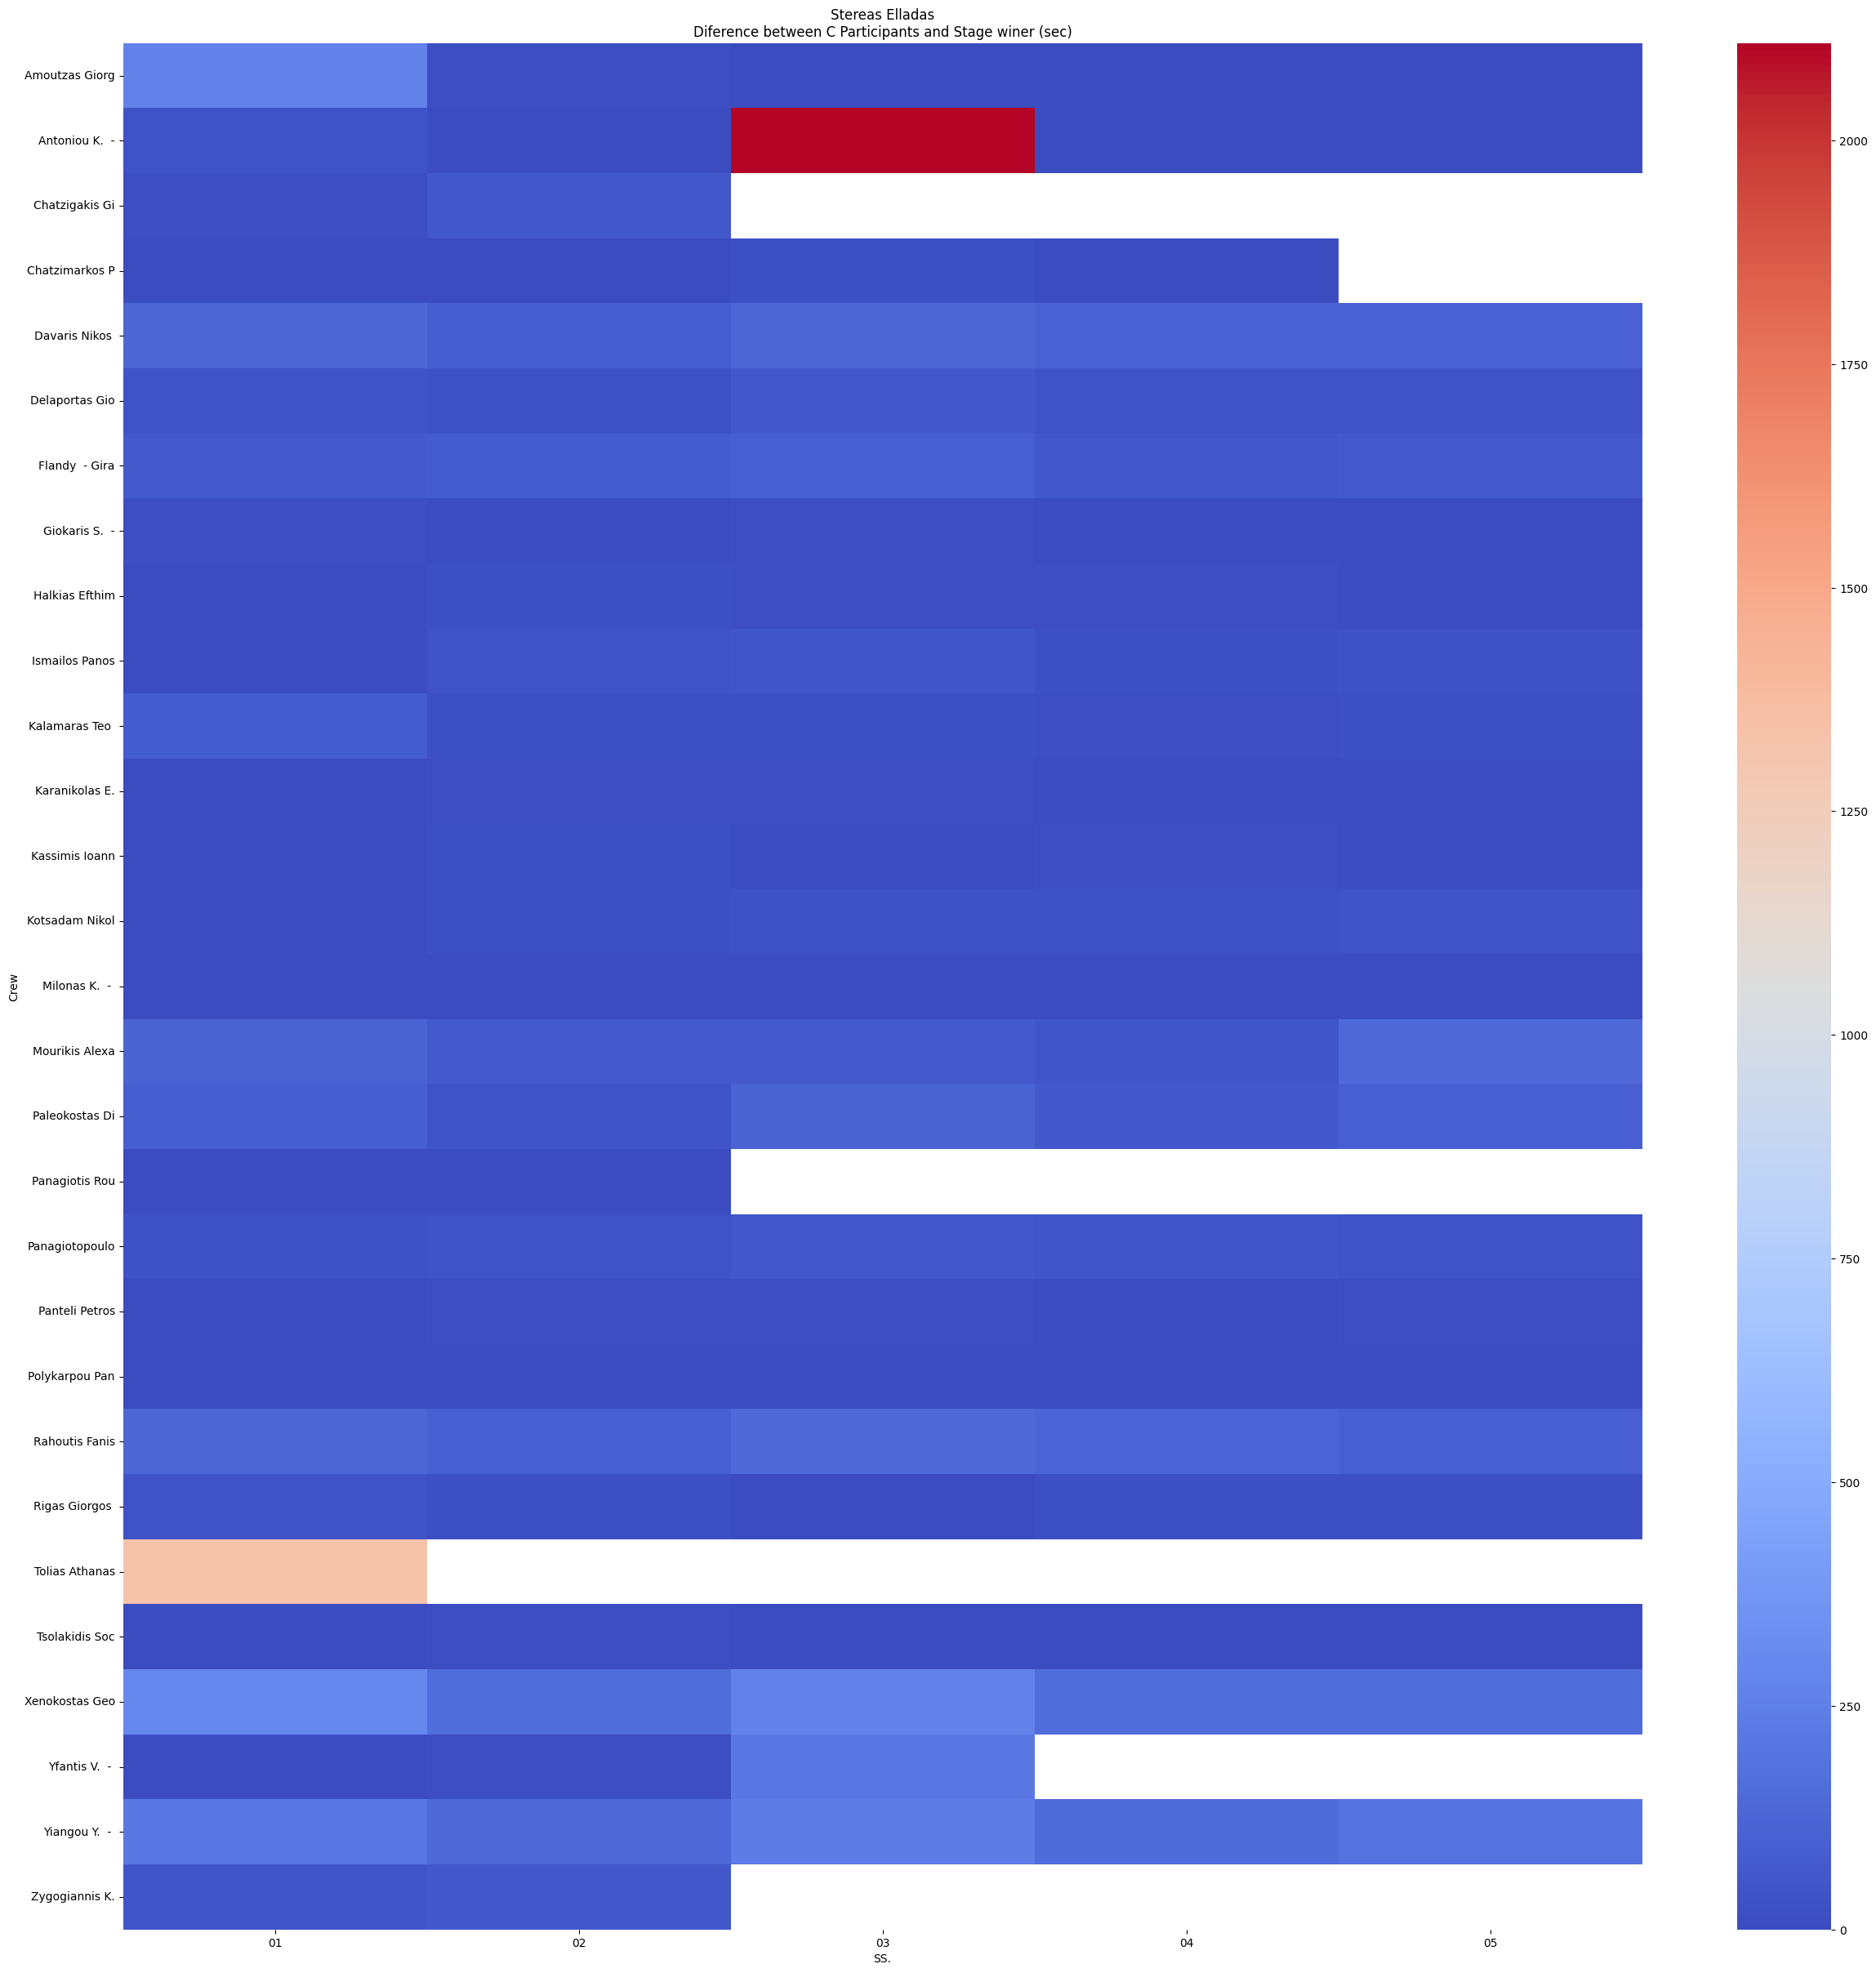

In [12]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + rallyname + ".png")
plt.show()

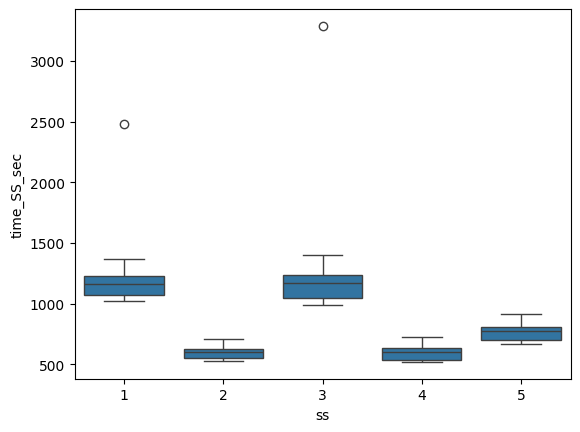

In [13]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + rallyname + Group + ".png")

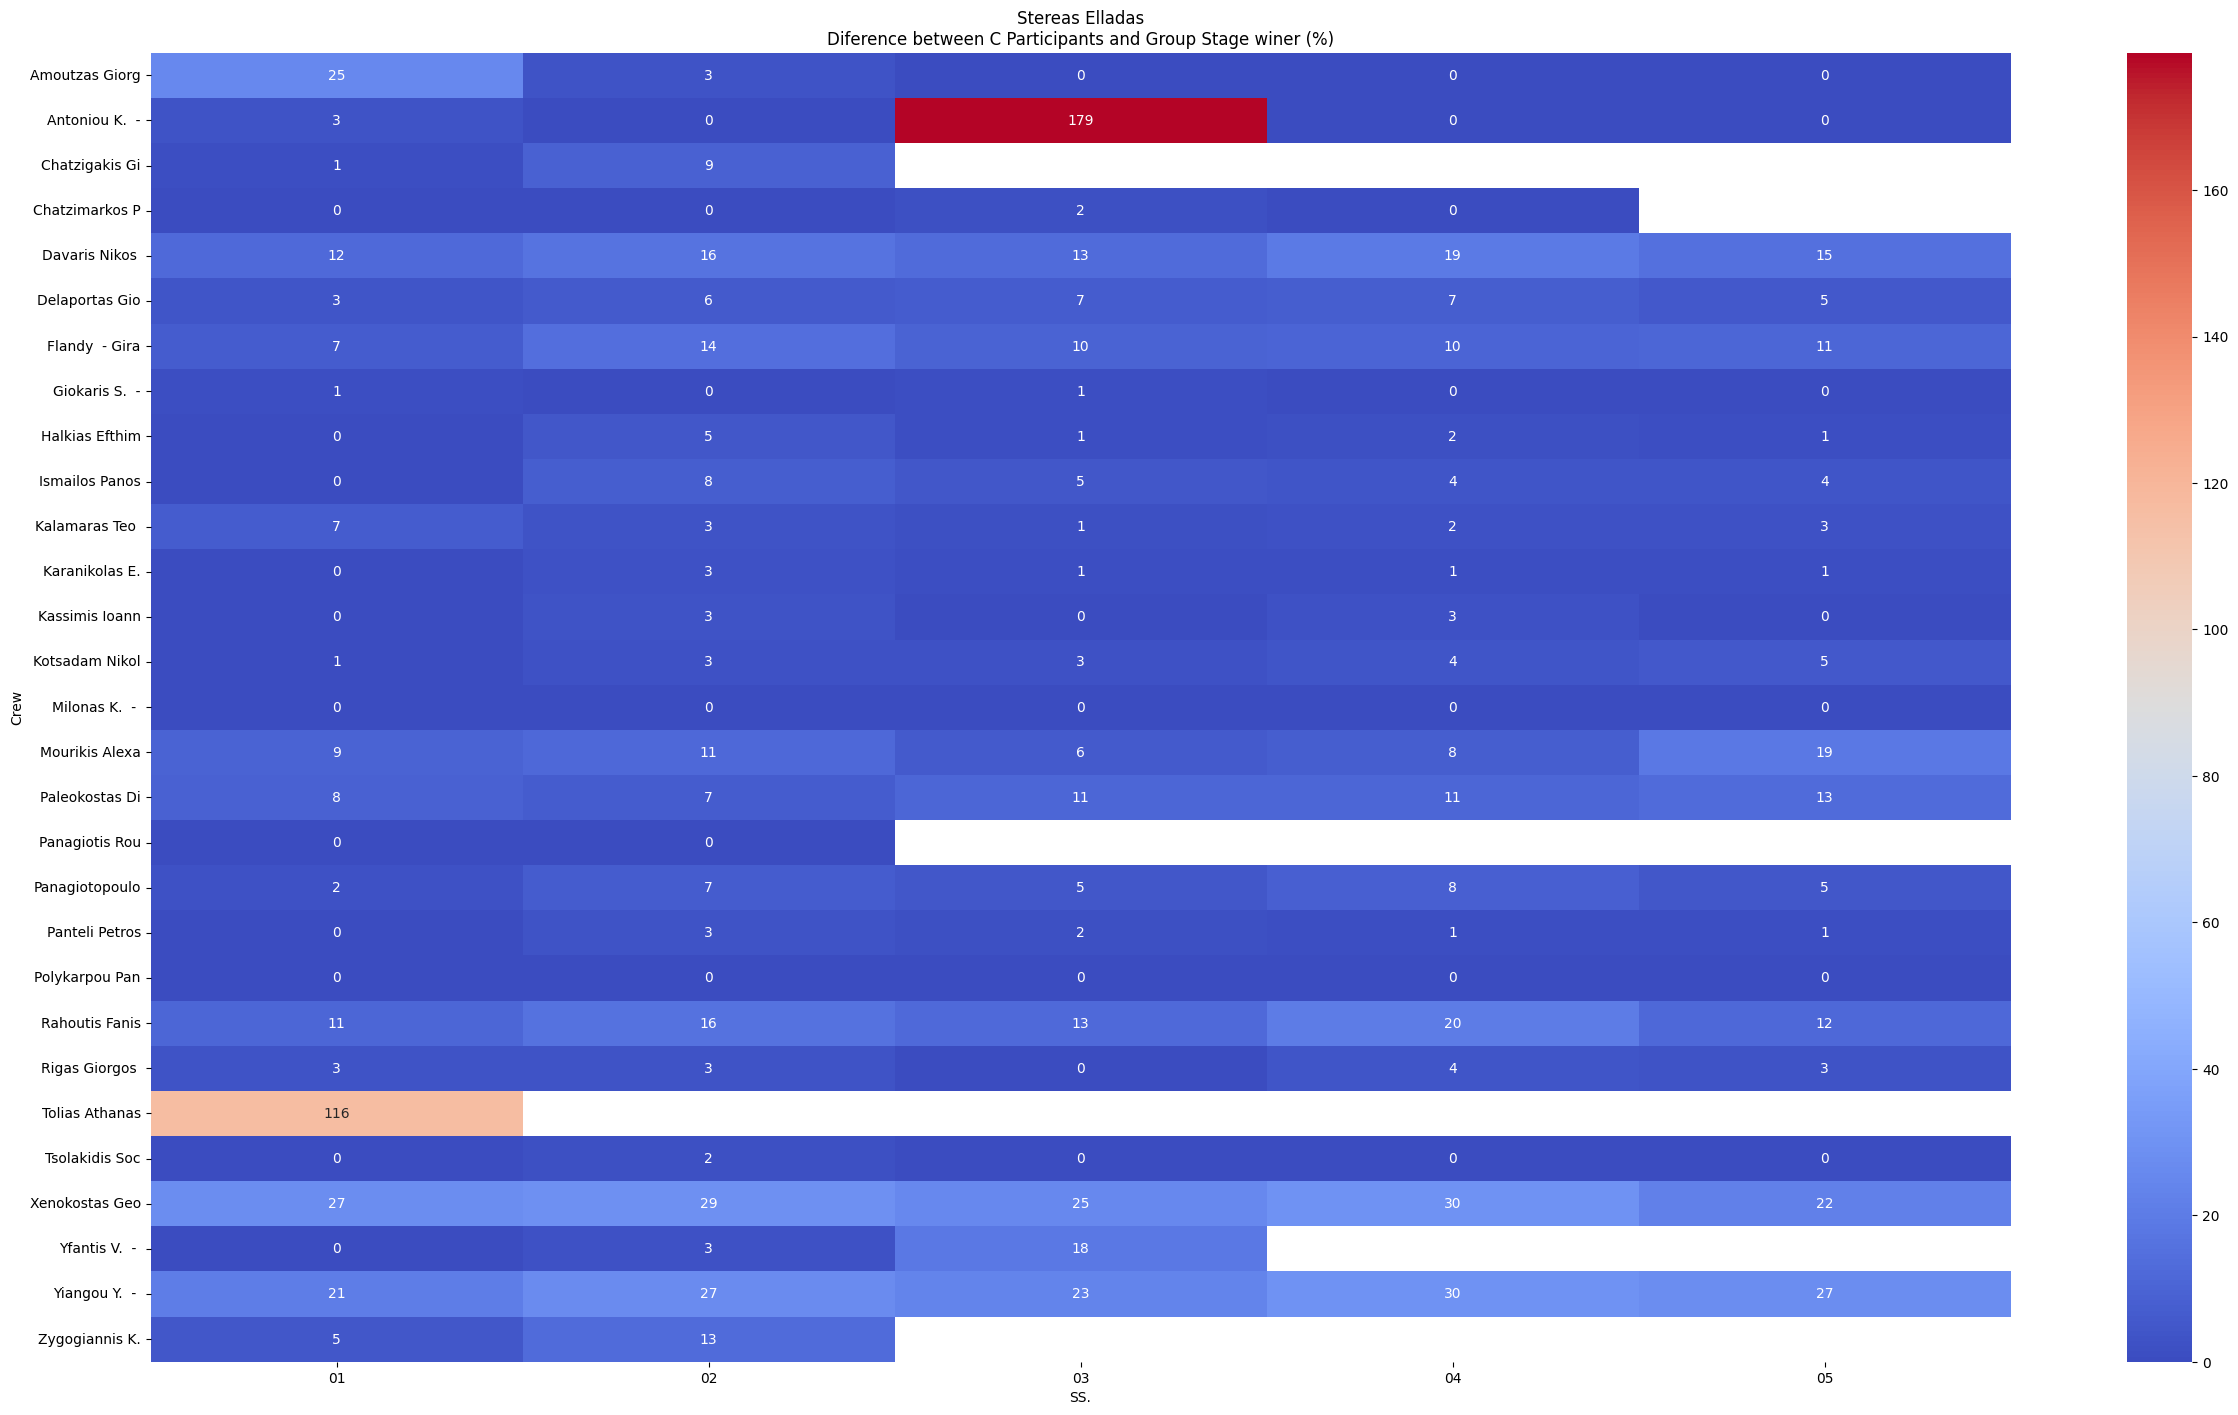

In [14]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".png")
plt.show()

In [15]:
ss_times_FIXED = ss_times_WRC.drop(ss_times_WRC[ss_times_WRC['time_SS_sec']>=1.2*ss_times_WRC['min_time_Gr']].index)
ss_times_FIXED
#ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Tsolakidis Soc,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,1,1020.00,1020.00,1020.00,0.00,0.00,0.000000,01
1,Panagiotis Rou,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,2,1020.00,1020.00,1020.00,0.00,0.00,0.000000,01
2,Halkias Efthim,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,3,1038.11,1038.11,1020.00,18.11,0.00,0.000000,01
3,Karanikolas E.,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,4,1038.11,1038.11,1020.00,18.11,0.00,0.000000,01
4,Chatzimarkos P,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,5,1038.11,1038.11,1020.00,18.11,0.00,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Giokaris S. -,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,13,785.72,785.72,663.31,122.41,0.00,0.000000,05
132,Kassimis Ioann,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,14,787.21,785.72,663.31,123.90,1.49,0.189635,05
133,Panagiotopoulo,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,18,823.85,785.72,663.31,160.54,38.13,4.852874,05
134,Kotsadam Nikol,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,19,825.07,785.72,663.31,161.76,39.35,5.008145,05


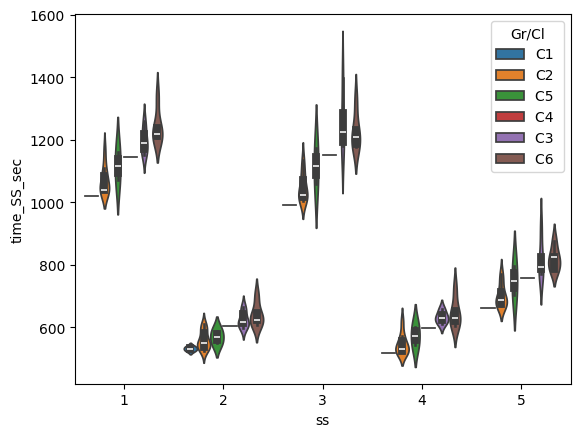

In [17]:
sns.violinplot(y=ss_times_FIXED['time_SS_sec'], x=ss_times_FIXED['ss'],hue=ss_times_FIXED['Gr/Cl'])
plt.savefig(rallyname + '_violinplot.png')

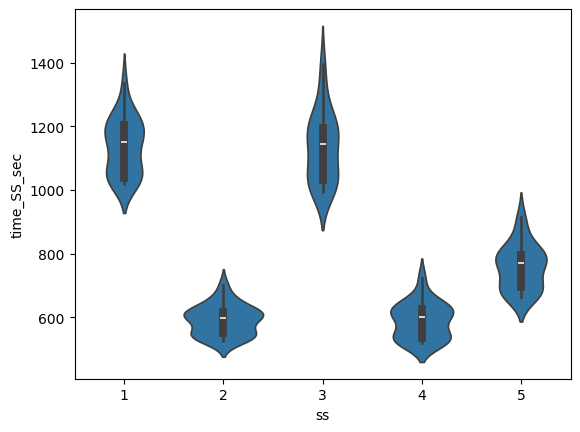

In [18]:
#sns.boxplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
sns.violinplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
plt.savefig(rallyname + '_violinplot_FIXED.png')

In [19]:
Thiva = ss_times_FIXED[(ss_times_FIXED["ss"] % 2 ==1) & (ss_times_FIXED["ss"] < 5)]
Elikonas = ss_times_FIXED[ss_times_FIXED["ss"] % 2 == 0]
Moschopodi = ss_times_FIXED[ss_times_FIXED["ss"] == 5]

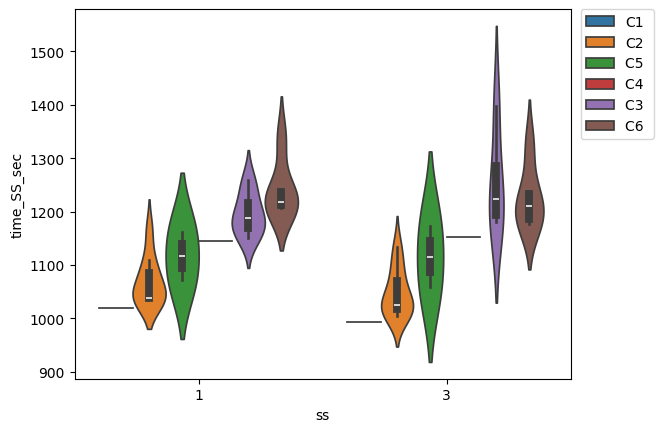

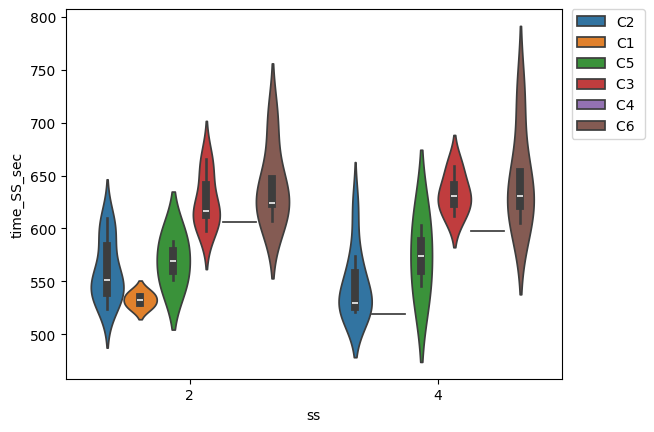

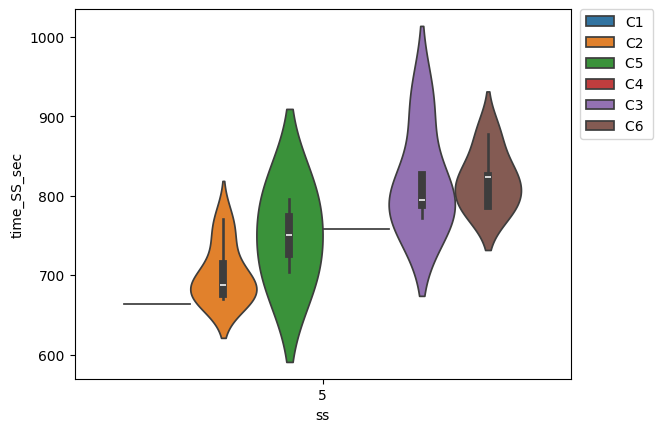

In [20]:
fig.set_size_inches(30,30)
sns.violinplot( y=Thiva["time_SS_sec"], x=Thiva["ss"], hue = Thiva["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Thiva_violinplot.png')
plt.show()
fig.set_size_inches(30,30)
sns.violinplot( y=Elikonas["time_SS_sec"], x=Elikonas["ss"], hue = Elikonas["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Elikonas_violinnplot.png')
plt.show()
fig.set_size_inches(30,30)
sns.violinplot( y=Moschopodi["time_SS_sec"], x=Moschopodi["ss"], hue = Moschopodi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Moschopodi_violinnplot.png')

In [21]:
Group = 'C1 - C2'
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6.to_csv(str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv('test2a.csv')

In [22]:
ss_times_C6_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_C6_F4 = pd.pivot_table(ss_times_C6_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_C6_F4

SS.,01,02,03,04,05
Crew,,,,,
Amoutzas Giorg,263.80,15.04,0.00,1.03,0.00
Chatzimarkos P,0.00,0.00,19.91,0.00,NaN
Davaris Nikos,127.38,85.46,129.57,99.24,100.68
Delaportas Gio,36.31,29.78,65.60,36.70,35.14
Flandy - Gira,70.85,74.38,95.56,53.24,73.86
Halkias Efthim,0.00,24.68,12.48,9.07,6.73
Ismailos Panos,0.00,40.09,45.49,21.36,26.88
Karanikolas E.,0.00,14.64,10.42,5.12,5.33
Panagiotis Rou,0.00,0.00,NaN,NaN,NaN


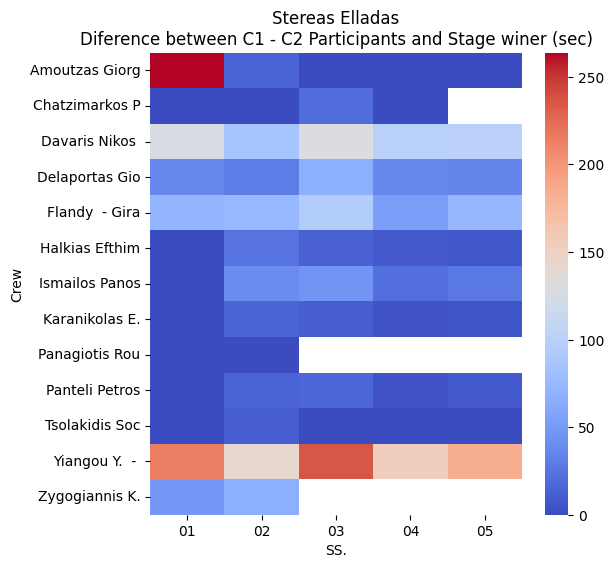

In [24]:
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
Heatmap_ALL = sns.heatmap(ss_times_C6_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()